In [1]:
x = 30.444
print(round(x)) 

30


In [24]:
import torch
from torch import nn
import random
def mystery(a, b):
  return torch.tensor(a+3*b) 
model = nn.Sequential(nn.Linear(2,1))
print(model) 
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)


In [25]:
for i in range(1000):
  a = random.random()
  b = random.random()
  desiredOutput = mystery(a,b)

  output = model(torch.tensor([a,b]))
  loss = criterion(output.squeeze(), desiredOutput)

  if (i % 100)==0:
    print (f"Loss: {loss.item()}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Loss: 12.72382640838623
Loss: 0.0012292738538235426
Loss: 5.152808444108814e-05
Loss: 7.683118019485846e-05
Loss: 3.5574839785113e-06
Loss: 3.2157811347133247e-07
Loss: 5.309870232395042e-08
Loss: 8.036295184865594e-09
Loss: 1.5475620784854982e-11
Loss: 2.3888446776254568e-11


In [26]:
a = 1.0
b = -1.0
output = model(torch.tensor([a,b]))
print (output.item())
mystery(a,b)

-1.999997854232788


tensor(-2.)

In [21]:
import torch
from torch import nn 

import matplotlib.pyplot as plt 

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

if device=='cuda':
  print (torch.cuda.get_device_name(device=device))

/home/rohithnd/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [23]:
import pandas as pd 
file_path = "./data_3.csv"
df = pd.read_csv(file_path)
df

,Week,Days,Time,Customer
0,1,2,5,20
1,2,5,3,30
2,3,7,3,21
3,4,3,3,36
4,5,1,1,4
...,...,...,...,...
95,96,1,1,3
96,97,4,2,24
97,98,7,1,7
98,99,5,6,120


In [141]:
df.head(10)

,Week,Days,Time,Customer
0,1,2,5,20
1,2,5,3,30
2,3,7,3,21
3,4,3,3,36
4,5,1,1,4
5,6,7,4,112
6,7,4,2,8
7,8,2,3,12
8,9,5,1,5
9,10,1,2,4


In [142]:
df.shape

(100, 4)

In [143]:
# DaysMean = df['Days'].mean()
# DaysStd = df['Days'].std()
# df['Days'] = abs((df['Days']-DaysMean)/DaysStd)
# df['Days'].head(10)

In [144]:
timeMean = df['Time'].mean()
timeStd = df['Time'].std()
df['Time'] = (df['Time']-timeMean)/timeStd
df['Time']

0     0.916509
1    -0.251018
2    -0.251018
3    -0.251018
4    -1.418546
        ...   
95   -1.418546
96   -0.834782
97   -1.418546
98    1.500273
99    0.332745
Name: Time, Length: 100, dtype: float64

In [145]:
numSoldMean = df['Customer'].mean()
numSoldStd = df['Customer'].std()
df['Customer'] = (df['Customer']-numSoldMean)/numSoldStd
df['Customer']

0    -0.460879
1    -0.158861
2    -0.430677
3     0.022349
4    -0.944107
        ...   
95   -0.974309
96   -0.340072
97   -0.853502
98    2.559297
99   -0.823300
Name: Customer, Length: 100, dtype: float64

In [146]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(-1, 1))
# df['Customer'] = scaler.fit_transform(df['Customer'] .reshape(-1, 1))
# # df['Time'] = scaler.fit_transform(df['Time'] .reshape(-1, 1))
# # df['Time'] = scaler.fit_transform(df['Time'] .reshape(-1, 1)) 
# df

In [147]:
inputs = ['Days' , 'Time']
x = torch.tensor(df[inputs].values,dtype=torch.float, device=device)

outputs = ['Customer']
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device) 



In [148]:
x[0:5]

tensor([[ 2.0000,  0.9165],
        [ 5.0000, -0.2510],
        [ 7.0000, -0.2510],
        [ 3.0000, -0.2510],
        [ 1.0000, -1.4185]])

In [149]:
y[0:5]

tensor([[-0.4609],
        [-0.1589],
        [-0.4307],
        [ 0.0223],
        [-0.9441]])

In [150]:
model = nn.Sequential(
            nn.Linear(2,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )

In [151]:
model.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [152]:
import torch.optim as optim

criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [153]:
for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)): 
        ypred = model(x[i])

        # accuracy 
        accuracy = 1 - torch.abs((ypred-y[i])/y[i]) 
        accuracy = accuracy.item() * 100         

        loss = criterion(ypred, y[i])

        totalLoss+=loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ("Total Loss: ", totalLoss)
    print('Accuracy' , accuracy)

Total Loss:  356.5321257427131
Accuracy -59.53768491744995
Total Loss:  111.54315270047482
Accuracy -96.81459665298462
Total Loss:  99.47701098447578
Accuracy 54.48344945907593
Total Loss:  87.9044299867287
Accuracy 52.76750326156616
Total Loss:  170.45330130798266
Accuracy 46.22437357902527


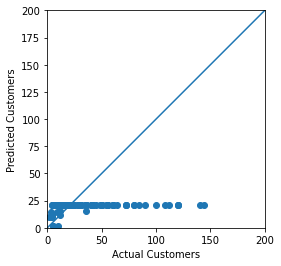

In [154]:
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):
    model.eval()                               

    predictions=[]                              
    actual=[]                                   

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)): 
        pred = model(x[i])                               
         
        pred = pred*numSoldStd+numSoldMean
        act = y[i]*numSoldStd+numSoldMean
 
        predictions.append(pred.tolist())
        actual.append(act.item())
 
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Customers')
    plt.ylabel('Predicted Customers')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)
 
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

graphPredictions(model, x, y, 0, 200)

In [155]:
# def datasetGenerator(weekend, sunny, warm, bigsign, price):
#     numlemonssold = 0
#     if weekend:
#         numlemonssold = (sunny*5  + int(500 / price))
#         if bigsign:
#             numlemonssold = 1.3 * numlemonssold
#         if warm:
#             numlemonssold = 2 * numlemonssold
#         if sunny:
#             numlemonssold = 1.25 * numlemonssold
#     numlemonssold = int(numlemonssold)   

#     return numlemonssold 

# weekend = 1
# sunny = 0
# warm = 0   
# bigsign = 1
# price = 5
 
# actual = datasetGenerator(weekend, sunny, warm, bigsign, price)
 
# model.to(device)
 
# price = (price - priceMean) / priceStd
 
# x1 = torch.tensor([weekend, sunny, warm, bigsign, price],dtype=float , device=device)
 
# y1 = model(x1.float())
 
# y1 = y1*numSoldStd+numSoldMean
 
# print ("Neural Network Predicts: ", y1.item())
# print ("Actual Result: ", actual)

In [156]:
# save a pytorch model 
torch.save(model.state_dict(), 'sales_employee.pt')

## prediction

In [157]:
import torch
from torch import nn 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [158]:
pretrained_model = nn.Sequential(
            nn.Linear(2,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )
pretrained_model.to(device) 
pretrained_model.load_state_dict( 
    torch.load('sales_employee.pt' , map_location=torch.device(device))
) 

<All keys matched successfully>

In [159]:
days =  5
time = 3
pretrained_model.to(device)
 
x1 = torch.tensor([days , time],dtype=float , device=device)
 
print("x1" , x1)
y1 = pretrained_model(x1.float())
print("y1" , y1)
 
print ("Neural Network Predicts: ", y1.item())

x1 tensor([5., 3.], dtype=torch.float64)
y1 tensor([-0.4336], grad_fn=<AddBackward0>)
Neural Network Predicts:  -0.4335535764694214


## random forest

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import pickle 


In [161]:
file_path = "./data_3.csv"
df = pd.read_csv(file_path)
df

,Week,Days,Time,Customer
0,1,2,5,20
1,2,5,3,30
2,3,7,3,21
3,4,3,3,36
4,5,1,1,4
...,...,...,...,...
95,96,1,1,3
96,97,4,2,24
97,98,7,1,7
98,99,5,6,120


In [162]:
df.shape

(100, 4)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Week      100 non-null    int64
 1   Days      100 non-null    int64
 2   Time      100 non-null    int64
 3   Customer  100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [165]:
X = df.drop(['Customer' , 'Week'], axis=1) 
X

,Days,Time
0,2,5
1,5,3
2,7,3
3,3,3
4,1,1
...,...,...
95,1,1
96,4,2
97,7,1
98,5,6


In [166]:
Y = df['Customer']

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [168]:
print(Y.shape, Y_train.shape, Y_test.shape)

(100,) (80,) (20,)


In [175]:
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=100)

In [176]:
accs=cross_val_score(model, X, Y, scoring=None, cv=10)
print(accs) 

[ 0.51789994 -4.01141964  0.48069356  0.53589691 -0.31488355  0.38182574
  0.43088451 -0.71803389  0.51512476  0.90819305]


In [178]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [181]:
# save the model 
pickle.dump(model, open('random_whole_model.pkl','wb')) 

In [4]:
# load the model 
model = pickle.load(open('random_whole_model.pkl','rb'))   

In [5]:
input_data = [2,5]

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[14.66216667]


/home/rohithnd/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## random forest for each employee prediction

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import pickle 

In [7]:
file_path = "./data_2.csv"
df = pd.read_csv(file_path)
df

,Week,Days,Employees,Customer
0,1,7,3,42
1,2,4,5,20
2,3,1,5,20
3,4,7,4,84
4,5,4,5,80
...,...,...,...,...
95,96,1,1,3
96,97,5,4,40
97,98,1,3,6
98,99,3,3,36


In [8]:
X = df.drop(['Customer' , 'Week'], axis=1) 
X

,Days,Employees
0,7,3
1,4,5
2,1,5
3,7,4
4,4,5
...,...,...
95,1,1
96,5,4
97,1,3
98,3,3


In [9]:
Y = df['Customer']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [11]:
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=100)

In [12]:
accs=cross_val_score(model, X, Y, scoring=None, cv=10)
print(accs)

[ 0.4610267   0.44239682 -0.74000864  0.25245603  0.53892223  0.78004323
  0.34929769  0.49657779  0.33917546  0.03145814]


In [13]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [14]:
# save the model 
pickle.dump(model, open('random_agent_model.pkl','wb')) 

In [15]:
# load the model 
model = pickle.load(open('random_agent_model.pkl','rb'))   

In [20]:
input_data = [3 , 4]

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[24.86066667]


/home/rohithnd/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
